<a href="https://colab.research.google.com/github/trevorcrupi/Epidemic-Simulation/blob/main/Epidemic_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plot
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import math
import random as random

In [2]:
n = 1000
t = 30
alpha = 14
beta = .15
movement_radius = .15
radius_of_infection = .02
rc('animation', html='jshtml')

In [3]:
def did_contract(susceptible, infective):
  did_contract = False
  distance = math.sqrt((susceptible[0] - infective[0])**2 + (susceptible[1] - infective[1])**2)
  if distance <= radius_of_infection:
    roulette = random.random()
    if roulette < beta:
      did_contract = True
  return did_contract

In [4]:
def move_individuals(community):
  for index,individual in enumerate(community):
    x_sign = random.choice([1, -1])
    x_delta = x_sign * random.random() * movement_radius
    newx = individual[0] + x_delta
    if (newx < 0) or (newx > 1):
      x_delta = -1 * x_delta
      newx = individual[0] + x_delta
    
    y_sign = random.choice([1, -1])
    y_delta = y_sign * random.random() * movement_radius
    newy = individual[1] + y_delta
    if (newy < 0) or (newy > 1):
      y_delta = -1 * y_delta
      newy = individual[1] + y_delta

    community[index] = [newx, newy]

In [5]:
def run_simulation(seed):
  random.seed(seed)
  daily_s  = []
  daily_r  = []
  daily_i  = []
  daily_r0 = []
  daily_track = []
  daily_community = []
  
  s = [i for i in range(0, n, 1)]
  r = []
  i = []
  track = {}
  community = [[.5, .5]] * n

  move_individuals(community)

  start = random.choice(s)
  del s[start]
  i.append(start)
  track[start] = 0

  for day in range(0,t,1):
    daily_contractions = []
    to_del_i = []
    infectives = len(i)
    daily_community.append(community[:])
    daily_track.append(track.copy())

    for s_index, susceptible in enumerate(s):
      for infected in i:
        contracted = did_contract(community[susceptible], community[infected])
        if contracted == True:
          daily_contractions.append(s_index)
          break
    
    new_infections = len(daily_contractions)
    for newly_infected in sorted(daily_contractions, reverse=True):
      person = s[newly_infected]
      i.append(s[newly_infected])
      del s[newly_infected]
      track[person] = day

    for i_index, infected in enumerate(i):
      duration = day - track[infected]
      if duration >= alpha:
        r.append(infected)
        to_del_i.append(i_index)

    for to_delete in sorted(to_del_i, reverse=True):
      del i[to_delete]

    move_individuals(community)

    if infectives != 0:
      r0 = new_infections/infectives
    else:
      r0 = 0

    daily_r0.append(r0)
    daily_s .append(len(s))
    daily_i .append(len(i))
    daily_r .append(len(r))
  return daily_s, daily_i, daily_r, daily_r0, daily_community, daily_track
   

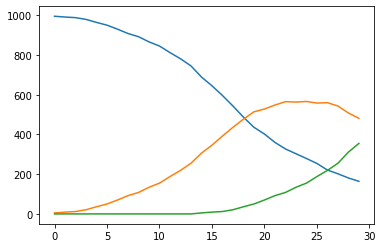

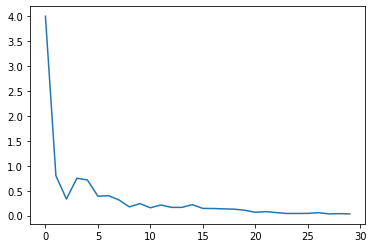

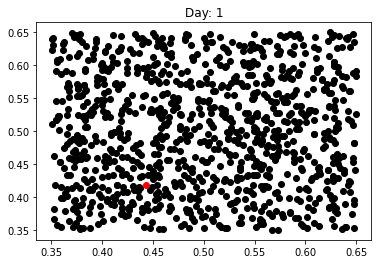

In [34]:
daily_s, daily_i, daily_r, daily_r0, daily_community, daily_track = run_simulation(3)
plot.plot(daily_s)
plot.plot(daily_i)
plot.plot(daily_r)
plot.figure()
plot.plot(daily_r0)
f = plot.figure()
ax = plot.axes()
def animate(i):
  ax.clear()
  plotreturn = ax.scatter([],[])
  recovered = [[],[]]
  new = [[],[]]
  old = [[],[]]
  susceptible = [[],[]] 
  for index,community in enumerate(daily_community[i]):
    ax.set_title("Day: " + str(i+1))
    if index in daily_track[i]:
      # Recovered
      if i - daily_track[i][index] >= alpha:
        recovered[0].append(community[0])
        recovered[1].append(community[1])
      # newly infected
      elif  i - daily_track[i][index] == 1:
        new[0].append(community[0])
        new[1].append(community[1])
      # Infected
      else:
        old[0].append(community[0])
        old[1].append(community[1])
    else:
      susceptible[0].append(community[0])
      susceptible[1].append(community[1])
  ax.scatter(susceptible[0], susceptible[1], c='k')
  ax.scatter(recovered[0], recovered[1], c='b')
  ax.scatter(old[0], old[1], c='r')
  plotreturn = ax.scatter(new[0], new[1], c='g')
  return plotreturn
anim = FuncAnimation(f, animate, frames=t, repeat=False)
anim



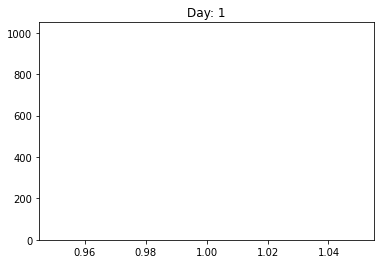

In [33]:
f2 = plot.figure()
ax2 = plot.axes()
def animate2(i):
  ax2.clear()
  ax2.set_title("Day: " + str(i+1))
  return plot.stackplot([x+1 for x in range(0, i+1)], daily_i[:i+1], daily_s[:i+1], daily_r[:i+1], colors=['orange', 'blue','green'], animated=True) 

anim2 = FuncAnimation(f2, animate2, frames=t, repeat=False)
anim2

In [ ]:
s = Susceptible(params...)
i = InfectedMayDie(params..., randomGenerator=Exponential)
d = Death()
r = Recovery(params..)
t = Treatment(simDeath=True, simRecovery=True)

f = Factory([s,i,t,r])

f.dailyControlFlow([s.dailyTick, i.dailyTick, t.dailyRecovery, r.dailyTick, t.dailyDeath])
f.setParams(animateLocation=True, plotCommunityAttributes=True)

f.getAnimated()